# Copy instead of modifying to preserve attack parameters

In [1]:
AGENT_NAME = 'default_PPO_citylearn_challenge_2022_phase_2_Building_6_20_bins_500'
DATASET_NAME = 'citylearn_challenge_2022_phase_2' #only action is electrical storage
SAVE_DIR = '5 run ACG 50th percentile value timing/'
RUNS = 5
TRIAL = 1

In [2]:
from stable_baselines3 import PPO

from citylearn.data import DataSet

from art.attacks.evasion import AutoConjugateGradient as ACG

import pandas as pd
import numpy as np

import KBMproject.utilities as utils

from joblib import Parallel, delayed

%matplotlib inline

In [3]:
schema = DataSet.get_schema(DATASET_NAME)

Define RL agent

In [4]:
agents = []
for _ in range (RUNS):
    agents.append(PPO.load(path=f"{AGENT_NAME}"))

In [5]:
envs = []
for _ in range (RUNS):
    envs.append(utils.make_discrete_env(schema=schema,  
                            action_bins=agents[0].action_space[0].n,
                            seed=42))

In [6]:
cols = utils.make_discrete_env(schema=schema,  
                            action_bins=agents[0].action_space[0].n,
                            seed=42).observation_names

Unperturbed agent performance

In [7]:
import os
path = os.path.join(os.getcwd(), '..','observation_masks.csv') #get adversary from parent directory
path = os.path.normpath(path) #resolve '..'
observation_masks = pd.read_csv(path)

In [8]:
%%time
init = 20
iter = int(500/init)
ACG_parameters = dict(
    loss_type='difference_logits_ratio', 
    batch_size=1,
    nb_random_init=init, #5, lower values speed crafting
    max_iter=iter, #iterations per restart
    norm='inf', #->l2 ->l1 most restrictive 
)
kwargs = dict(
    ART_atk=ACG,
    ART_atk_kwargs=ACG_parameters,
    eps_candidates=[0.01,0.03,0.05,0.07],
    time_steps=None,
    mask=observation_masks['mask_time'].to_numpy(),
    init_step_coeff=2,
    value_threshold=-70,
)
func = utils.eval_untargeted_dynamic_distortion_attack_value_threshold

results = Parallel(n_jobs=RUNS, verbose=10, prefer='threads')(delayed(
    func)(agent, env, **kwargs) for agent, env in zip(agents, envs)) 


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
  0%|          | 0/8759 [00:00<?, ?it/s]





  0%|          | 5/8759 [00:00<03:28, 41.91it/s]






  0%|          | 10/8759 [00:00<03:31, 41.35it/s]





  0%|          | 15/8759 [00:01<19:12,  7.59it/s]













  0%|          | 19/8759 [00:18<3:48:19,  1.57s/it]












  0%|          | 19/8759 [00:30<3:48:19,  1.57s/it]








  0%|          | 23/8759 [00:36<6:38:14,  2.74s/it]











  0%|          | 28/8759 [00:51<6:57:45,  2.87s/it]






















  0%|          | 30/8759 [01:15<10:52:07,  4.48s/it]
























  0%|          | 31/8759 [01:31<15:16:12,  6.30s/it]






















  0%|          | 32/8759 [01:47<19:49:06,  8.18s/it]















  0%|          | 33/8759 [02:03<23:47:38,  9.82s/it]














































  0%|          | 34/8759 [02:19<27:10:01, 11.21s/it]






































































The Adversarial success rate is: 0.9888863687911091
The average distance between optinmal and adversarial actions is: 1.3143052859915532











 63%|██████▎   | 5511/8759 [4:57:49<11:24:59, 12.65s/it]









 63%|██████▎   | 5512/8759 [4:57:59<10:29:49, 11.64s/it]










 63%|██████▎   | 5513/8759 [4:58:07<9:43:01, 10.78s/it] 












 63%|██████▎   | 5515/8759 [4:58:18<6:50:00,  7.58s/it]


 63%|██████▎   | 5517/8759 [4:58:20<3:54:40,  4.34s/it]































 63%|██████▎   | 5518/8759 [4:58:33<6:12:56,  6.90s/it]













 63%|██████▎   | 5519/8759 [4:58:43<6:56:53,  7.72s/it]
















 63%|██████▎   | 5520/8759 [4:58:52<7:14:27,  8.05s/it]


















 63%|██████▎   | 5521/8759 [4:59:05<8:34:36,  9.54s/it]
































 63%|██████▎   | 5522/8759 [4:59:21<10:23:09, 11.55s/it]



















 63%|██████▎   | 5523/8759 [4:59:33<10:39:52, 11.86s/it]











 63%|██████▎   | 5524/8759 [4:59:42<9:49:04, 10.93s/it] 










 63%|██████▎   | 5525/8759 [4:59:51<9:13:44, 10.27s/it]


















 63%|██████▎   | 5526/8759 [5:00:03<9:39:49, 10.76s/it]


The Adversarial success rate is: 0.9877551020408163
The average distance between optinmal and adversarial actions is: 1.325151272976366


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed: 312.8min remaining: 469.2min



 64%|██████▍   | 5638/8759 [5:12:48<6:06:05,  7.04s/it]






 64%|██████▍   | 5639/8759 [5:12:54<5:50:01,  6.73s/it]



 64%|██████▍   | 5640/8759 [5:12:59<5:34:14,  6.43s/it]








 64%|██████▍   | 5641/8759 [5:13:06<5:38:02,  6.51s/it]









 64%|██████▍   | 5642/8759 [5:13:14<5:55:47,  6.85s/it]













 64%|██████▍   | 5647/8759 [5:13:26<2:05:31,  2.42s/it]









 64%|██████▍   | 5649/8759 [5:13:32<2:16:56,  2.64s/it]











 65%|██████▍   | 5650/8759 [5:13:43<4:16:58,  4.96s/it]







 65%|██████▍   | 5651/8759 [5:13:48<4:26:54,  5.15s/it]










 65%|██████▍   | 5652/8759 [5:13:54<4:37:22,  5.36s/it]


 65%|██████▍   | 5653/8759 [5:13:55<3:26:32,  3.99s/it]
















 65%|██████▍   | 5654/8759 [5:14:04<4:53:03,  5.66s/it]






 65%|██████▍   | 5657/8759 [5:14:12<2:44:27,  3.18s/it]










 65%|██████▍   | 5660/8759 [5:14:19<2:00:45,  2.34s/it]




 65%|██████▍   | 

The Adversarial success rate is: 0.9904740303923792
The average distance between optinmal and adversarial actions is: 1.3256079461125723


[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed: 341.4min remaining: 227.6min
 69%|██████▉   | 6040/8759 [5:41:26<3:21:37,  4.45s/it]



 69%|██████▉   | 6050/8759 [5:41:47<1:56:20,  2.58s/it]

 69%|██████▉   | 6060/8759 [5:42:03<1:37:01,  2.16s/it]

 69%|██████▉   | 6064/8759 [5:42:09<57:13,  1.27s/it]  

 69%|██████▉   | 6066/8759 [5:42:14<1:20:25,  1.79s/it]




 69%|██████▉   | 6069/8759 [5:42:21<1:22:54,  1.85s/it]

 69%|██████▉   | 6070/8759 [5:42:25<1:46:46,  2.38s/it]


 69%|██████▉   | 6072/8759 [5:42:33<2:17:36,  3.07s/it]





 69%|██████▉   | 6073/8759 [5:42:39<3:05:11,  4.14s/it]

 69%|██████▉   | 6074/8759 [5:42:43<3:02:39,  4.08s/it]


 69%|██████▉   | 6076/8759 [5:42:50<2:51:33,  3.84s/it]

 69%|██████▉   | 6079/8759 [5:42:53<1:18:26,  1.76s/it]


 69%|██████▉   | 6083/8759 [5:43:03<1:53:18,  2.54s/it]

 70%|██████▉   | 6088/8759 [5:43:12<1:04:03,  1.44s/it]

 70%|██████▉   | 6089/8759 [5:43:16<1:38:36,  2.22s/it]

 70%|██████▉   | 6091/8759 [5:43:24<2:09:08,  2.90s

The Adversarial success rate is: 0.9907176816844012
The average distance between optinmal and adversarial actions is: 1.3197853636259897


100%|█████████▉| 8758/8759 [6:55:44<00:02,  2.85s/it]  


The Adversarial success rate is: 0.9886698391117154
The average distance between optinmal and adversarial actions is: 1.317387829660921
CPU times: total: 14h 7min 26s
Wall time: 6h 55min 47s


[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed: 415.8min finished


Results is a list of tupples for each run, of the format(KPIs, observations, perturbed observations, epsilons)

In [9]:
for run in range(RUNS):
        # np.savetxt(f'run {run} obs {TRIAL}.csv', results[run][1], delimiter=",")
        # np.savetxt(f'run {run} adv_obs {TRIAL}.csv', results[run][2], delimiter=",")
    pd.DataFrame(results[run][1],columns=cols,).to_csv(SAVE_DIR+f'run {run} obs {TRIAL}.csv',)
    pd.DataFrame(results[run][2],columns=cols,).to_csv(SAVE_DIR+f'run {run} adv obs {TRIAL}.csv')

In [10]:
kpis = [results[i][0] for i in range(len(results))]
df_kpis = pd.concat(kpis, axis='columns',keys=range(RUNS))

In [11]:
df_kpis[['mean', 'std', 'variance']] = df_kpis.agg(['mean','std', 'var'], axis='columns')

In [12]:
df_kpis.to_csv(SAVE_DIR+f'{RUNS} run KPIs {TRIAL}.csv')

In [13]:
df_kpis

,0,1,2,3,4,mean,std,variance
cost_function,,,,,,,,
annual_peak_average,1.102270,1.102271,1.102271,1.102271,1.102271,1.102271,3.970812e-07,1.576735e-13
carbon_emissions_total,0.891311,0.891705,0.891027,0.893199,0.890577,0.891564,1.002569e-03,1.005144e-06
cost_total,0.807021,0.807871,0.806640,0.808686,0.806617,0.807367,8.952344e-04,8.014447e-07
daily_one_minus_load_factor_average,1.014776,0.391780,1.213375,1.176201,0.328115,0.824849,4.314993e-01,1.861916e-01
daily_peak_average,0.930236,0.928872,0.927412,0.933637,0.923217,0.928675,3.823566e-03,1.461966e-05
electricity_consumption_total,0.901684,0.901387,0.900985,0.902761,0.900261,0.901416,9.219719e-04,8.500321e-07
monthly_one_minus_load_factor_average,0.986828,0.984877,0.988345,0.988359,0.987335,0.987149,1.431094e-03,2.048029e-06
ramping_average,1.195876,1.195296,1.193539,1.198792,1.188740,1.194449,3.709350e-03,1.375927e-05
zero_net_energy,1.109305,1.109534,1.109153,1.109110,1.109145,1.109250,1.757605e-04,3.089174e-08


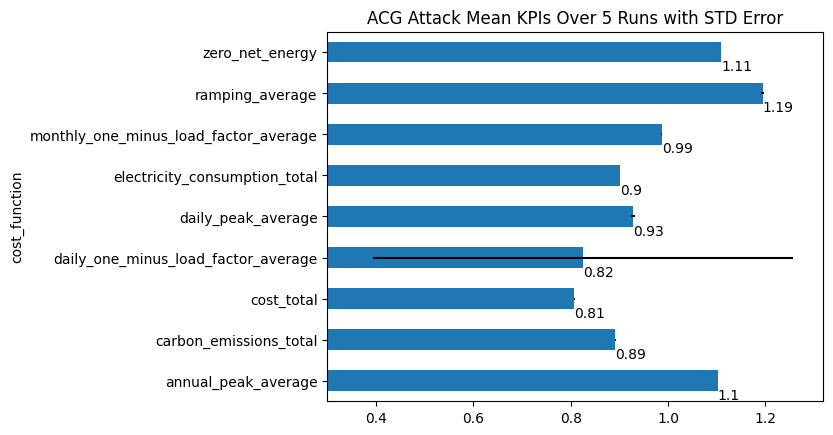

In [14]:
ax = df_kpis['mean'].plot.barh(xerr = df_kpis['std'], xlim=0.3, title='ACG Attack Mean KPIs Over 5 Runs with STD Error')
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), 
            i.get_y()-0.2,
            str(round((i.get_width()), 2)), 
            fontsize=10, 
            #color='dimgrey'
            )

In [15]:
eps = [pd.Series(results[i][3]) for i in range(len(results))]
df_eps = pd.concat(eps, axis='columns',keys=range(RUNS))

In [16]:
df_eps.to_csv(SAVE_DIR+f'{RUNS} run epsilons {TRIAL}.csv')

In [17]:
eps_value_counts = df_eps.apply(lambda col: col.value_counts(), axis='rows')

Calculate the ASRs (notna returns a series of 0 or 1 for True or False, to the mean is the proportion)

In [18]:
ASRs = df_eps.notna().mean()
ASRs.name = 'ASR'
eps_value_counts = eps_value_counts.append(ASRs)
eps_value_counts[['mean', 'std', 'variance']] = eps_value_counts.agg(['mean','std', 'var'], axis='columns')

In [19]:
eps_value_counts

,0,1,2,3,4,mean,std,variance
0.01,1895.00000,1880.00000,1863.000000,1888.000000,1886.000000,1882.400000,12.095454,146.300000
0.03,1856.00000,1853.00000,1865.000000,1883.000000,1879.000000,1867.200000,13.423859,180.200000
0.05,472.00000,495.00000,506.000000,470.000000,466.000000,481.800000,17.640862,311.200000
0.07,133.00000,139.00000,126.000000,135.000000,132.000000,133.000000,4.743416,22.500000
ASR,0.98619,0.98868,0.987095,0.990718,0.987775,0.988091,0.001729,0.000003


<Axes: title={'center': 'Mean Epsilon Values of 5 runs'}, ylabel='mean'>

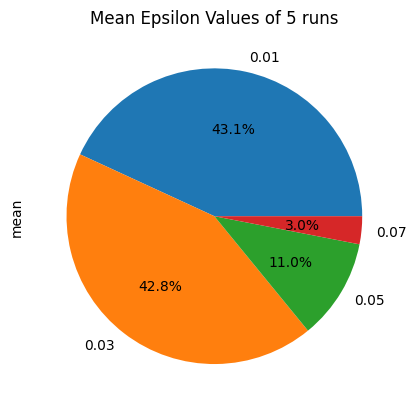

In [20]:
eps_value_counts['mean'].iloc[:-1].plot.pie(autopct='%1.1f%%', title=f'Mean Epsilon Values of {RUNS} runs')